Quote from 
https://www.coursereport.com/schools/the-data-incubator#/news/cracking-the-bootcamp-interview-the-data-incubator

"Here is a sample of one of our past challenge questions. We don’t re-use them, but this gives you an idea of what to expect:

A chess knight piece is sitting on the "0" key of  a numeric keypad.

|   |   |   |
|---|---|---|
| 1 | 2 | 3 |
| 4 | 5 | 6 |
| 7 | 8 | 9 |
|   | 0 |   |

The knight makes T jumps to other keys according to its allowable moves (so that from each reachable key it has two or three allowable moves). The knight chooses amongst the allowable moves uniformly at random and keeps track of the running sum SS of keys on which it lands. We are interested in S under the modulo operator.

After T=10T10 moves, what is the expected value of the quantity S mod 10?"

(I assume there is a typo, instead of T=10T10, it's T=10)

In [157]:
import numpy as np

# knightCanJumpTo determines the list of the possible knight's jumps
def knightCanJumpTo(cell):
    if cell==0: return [4,6]
    elif cell==1: return [6,8]
    elif cell==2: return [7,9]
    elif cell==3: return [4,8]
    elif cell==4: return [0,3,9]
    elif cell==5: return 'NOWHERE'
    elif cell==6: return [0,1,7]
    elif cell==7: return [2,6]
    elif cell==8: return [1,3]
    elif cell==9: return [2,4]
    else: return 'UNKNOWN START CELL'

# knightJumpsTo deternimes where the knight will actually jump to
def knightJumpsTo(cell):
    listOfCells = knightCanMoveTo(cell)
    arr = np.array(listOfCells)
    r = np.random.randint(arr.size)
    return arr[r]

# knight makes T jumps
# cell - starting cell (=0), 
# T - number of jumps (=10), S - sum of keys (=0) 
def knightMakesTJumps(cell, T, S=0, testMode=False):
    if (testMode):
        print ('cell={}, T={}, S={}'.format(cell,T,S))
    if (T==0): return S
    cellNew = knightJumpsTo(cell)
    return knightMakesTJumps(cellNew,T-1,S+cellNew,testMode)

# generate an array of 'knightMakesTJumps' outcomes
def generateNEvents (N):
    arr=np.zeros(N)
    for n in list(range(0,N)):
        arr[n]=knightMakesTJumps(cell=0, T=10)
    return arr

In [158]:
# Test 
knightMakesTJumps(cell=0, T=10, testMode=True)

cell=0, T=10, S=0
cell=4, T=9, S=4
cell=0, T=8, S=4
cell=4, T=7, S=8
cell=0, T=6, S=8
cell=4, T=5, S=12
cell=0, T=4, S=12
cell=6, T=3, S=18
cell=7, T=2, S=25
cell=6, T=1, S=31
cell=7, T=0, S=38


38

In [165]:
# Generate 100000 events
arr = generateNEvents(10000)
arrMean = np.mean(arr)
arrMode = arr % 10
arrModeMean = np.mean(arrMode)
print('arrMean={}, arrModeMean={}'.format(arrMean,arrModeMean))

arrMean=44.0623, arrModeMean=4.5763


Now let's check distribution of S with seaborn

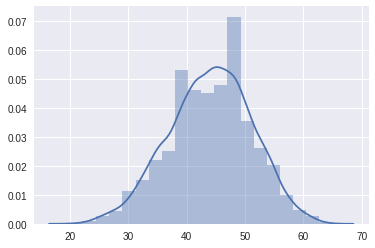

In [166]:
import pandas as pd
import seaborn as sns
%matplotlib inline

pd_Knight = pd.Series(data=arr)
sns.distplot(pd_Knight, bins=20)